<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/Python/answer/06a_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第6章

## 課題

scikit-learn付属のdiabetesデータに対して、なるべく性能の高い回帰モデルを求めてください。

## 線形回帰

必要なライブラリを読み込みます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

### データの読み込み

In [2]:
diabetes = load_diabetes(as_frame=True)
print(diabetes.DESCR)
X = diabetes.data
y = diabetes.target

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [3]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


組み込みデータセットの特徴名はfeature_names属性の値として文字列配列の形式で得られます。回帰式の解釈に必要になるので確認しておきます。

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

### 評価

交差確認による[決定係数](http://mathtrain.jp/ketteikeisu)を用いた評価を行います。cross_val_scoreメソッドのscoring引数で決定係数を指定します。scoring引数の可能な値は[こちら](http://scikit-learn.org/stable/modules/model_evaluation.html)。また、交差確認における分割をランダムにするため、[ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)を使い、[LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)で線形回帰関数の学習を行います。

何度かセルを実行してみると、評価値が比較的大きく変動することがわかります。回帰問題では、データ分割の違いによる学習結果の影響が大きいようです。

In [5]:
cv = ShuffleSplit(n_splits=10)
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=cv, scoring='r2')
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.49 (+/- 0.06)


ひとつ抜き方による評価は二乗誤差の平均の負数を用います。評価用のデータが1つなので、相関係数が求められないからです。こちらはランダム性はないので、分散を求める必要はありません。

In [6]:
cv2 = LeaveOneOut()
scores = cross_val_score(lr, X, y, cv=cv2, scoring='neg_mean_squared_error')
print(f"{scores.mean():.2f}")

-3001.75


## 正則化

[Ridge回帰(L2)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
のパラメータalphaの値でL2正則化項の重みを調整することで、汎化性能が上がる可能性があります。

In [7]:
lr2 = Ridge(alpha=0.001)
scores = cross_val_score(lr2, X, y, cv=cv, scoring='r2')
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.48 (+/- 0.10)


ひとつ抜き方による二乗誤差を用いた評価

In [8]:
scores = cross_val_score(lr2, X, y, cv=cv2, scoring='neg_mean_squared_error')
print(f"{scores.mean():.2f}")

-3000.65


[Lasso回帰(L1)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
のパラメータalphaの値を大きくすれば、L1正則化項の重みが大きくなり、重みが0となる次元が増えます。

In [9]:
lr3 = Lasso(alpha=0.05)
scores = cross_val_score(lr3, X, y, cv=cv, scoring='r2')
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.47 (+/- 0.09)


ひとつ抜き方による二乗誤差を用いた評価

In [10]:
scores = cross_val_score(lr3, X, y, cv=cv2, scoring='neg_mean_squared_error')
print(f"{scores.mean():.2f}")

-2993.75


## 回帰木

回帰木の作成。深さは3にしておきます。

In [11]:
rt = DecisionTreeRegressor(max_depth = 3)
rt.fit(X, y)

DecisionTreeRegressor(max_depth=3)

木の表示

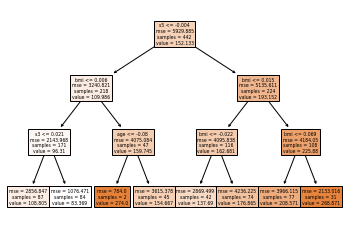

In [12]:
plot_tree(rt, filled=True, feature_names=diabetes.feature_names)
plt.show()


### 評価

交差確認による決定係数を用いた評価

In [13]:
scores = cross_val_score(rt, X, y, cv=cv, scoring='r2')
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.25 (+/- 0.18)


ひとつ抜き方による二乗誤差を用いた評価

In [14]:
scores = cross_val_score(rt, X, y, cv=cv2, scoring='neg_mean_squared_error')
print(f"{scores.mean():.2f}")

-3542.26


### ハイパーパラメータの変更

木を浅くしてみます。

In [15]:
rt2 = DecisionTreeRegressor(max_depth = 2)
rt2.fit(X, y)

DecisionTreeRegressor(max_depth=2)

木の表示

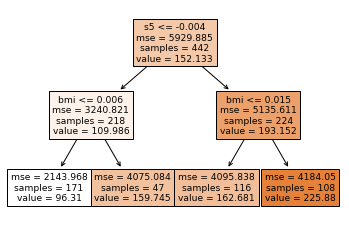

In [16]:
plot_tree(rt2, filled=True, feature_names=diabetes.feature_names)
plt.show()

交差確認による決定係数を用いた評価

In [17]:
scores = cross_val_score(rt2, X, y, cv=cv, scoring='r2')
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.36 (+/- 0.10)


ひとつ抜き方による二乗誤差を用いた評価

In [18]:
scores = cross_val_score(rt2, X, y, cv=cv2, scoring='neg_mean_squared_error')
print(f"{scores.mean():.2f}")

-3554.94


木を深くしてみます。

In [19]:
rt3 = DecisionTreeRegressor(max_depth = 6)
rt3.fit(X, y)

DecisionTreeRegressor(max_depth=6)

木の表示

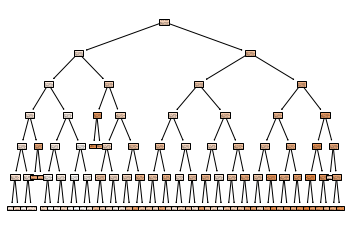

In [20]:
plot_tree(rt3, filled=True, feature_names=diabetes.feature_names)
plt.show()

交差確認による決定係数を用いた評価

In [21]:
scores = cross_val_score(rt3, X, y, cv=cv, scoring='r2')
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.12 (+/- 0.15)


ひとつ抜き方による二乗誤差を用いた評価

In [22]:
scores = cross_val_score(rt3, X, y, cv=cv2, scoring='neg_mean_squared_error')
print(f"{scores.mean():.2f}")

-5072.06


全般的に回帰木より線形回帰の方が性能が良さそうです。性能差は小さいですが、線形回帰の中ではLasso回帰の性能が高くなりそうです。